# Emotions Detection in Text

In [4]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/TEXT/data.csv")

In [6]:
df.head()

,Emotion,Text
0,ptsd,"He said he had not felt that way before, sugge..."
1,assistance,"Hey there r/assistance, Not sure if this is th..."
2,ptsd,My mom then hit me with the newspaper and it s...
3,relationships,"until i met my new boyfriend, he is amazing, h..."
4,survivorsofabuse,October is Domestic Violence Awareness Month a...


In [7]:
# Value Counts
df['Emotion'].value_counts()

Emotion
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

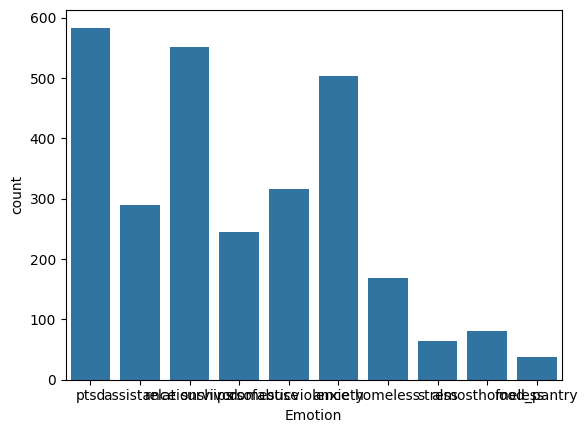

In [8]:
# Plot
sns.countplot(x='Emotion',data=df)

In [9]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [11]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [12]:
df

,Emotion,Text,Clean_Text
0,ptsd,"He said he had not felt that way before, sugge...","said felt way before, suggeted rest ..TRIGGER ..."
1,assistance,"Hey there r/assistance, Not sure if this is th...","Hey r/assistance, sure right place post this....."
2,ptsd,My mom then hit me with the newspaper and it s...,"mom hit newspaper shocked this, knows like pla..."
3,relationships,"until i met my new boyfriend, he is amazing, h...","met new boyfriend, amazing, kind, sweet, good ..."
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,October Domestic Violence Awareness Month dome...
...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...","* Her, week ago: Precious, you? (I ignored her..."
2834,ptsd,I don't have the ability to cope with it anymo...,"ability cope anymore. I'm trying, lot things t..."
2835,anxiety,In case this is the first time you're reading ...,case time reading post... looking people willi...
2836,almosthomeless,Do you find this normal? They have a good rela...,find normal? good relationship. Main problem m...


In [13]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# It is advisable to split before applying pipelines because it prevents data leakage.

In [14]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [15]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [16]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [17]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [18]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.45539906103286387

In [23]:
# Make A Prediction
ex1 = " Also the headaches. LOADS of headaches all the time. Iâ€™m so done. I hate this almost as bad as my brain constantly telling me Iâ€™m a POS. Anxiety is fun :)"

In [24]:
pipe_lr.predict([ex1])

array(['anxiety'], dtype=object)

In [25]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[7.31184144e-03, 8.44857457e-01, 1.25261686e-02, 8.67834975e-03,
        5.65852973e-04, 1.94940687e-03, 4.94117893e-02, 1.81479337e-02,
        1.54231322e-02, 4.11280677e-02]])

In [26]:
# To Know the classes
pipe_lr.classes_

array(['almosthomeless', 'anxiety', 'assistance', 'domesticviolence',
       'food_pantry', 'homeless', 'ptsd', 'relationships', 'stress',
       'survivorsofabuse'], dtype=object)

In [27]:
# Save Model & Pipeline
import joblib
pipeline_file = open("/content/drive/MyDrive/TEXT/stress.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()